In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from keras import layers

# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
#getting data
dataset = pd.read_csv("https://raw.githubusercontent.com/saswat711/Machine-Learning-Project/main/Admission%20Predictions/Admission_Predict_Ver1.1.csv")
dataset.head()

# splitting to train and test dataset
# for the model
size = int(len(dataset) * .2)

# getting training and test data
train_dataset = dataset.iloc[:-size]
test_dataset = dataset.iloc[-size:]
train_dataset.head()
test_dataset.head()

train_dataset.keys()
#For Y variables
train_label = train_dataset.pop('Chance of Admit ')
test_label = test_dataset.pop('Chance of Admit ')

train_dataset.pop('Serial No.')
test_dataset.pop('Serial No.')
#For the columns
# for the columns
NUMERIC_COLUMNS = [	'GRE Score',	'TOEFL Score',	'University Rating',	'SOP',	'LOR',	'CGPA',	'Research']

feature_columns = []
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='GRE Score', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='TOEFL Score', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='University Rating', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SOP', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='LOR', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='CGPA', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Research', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(100)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(train_dataset, train_label)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(test_dataset, test_label, num_epochs=1, shuffle=False)

# We create a regression by passing the feature columns we created earlier
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(train_dataset.keys()),)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()

model.fit(train_dataset, train_label, epochs=4, verbose=0)
# Evaluating
res = model.evaluate(test_dataset, test_label, verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 32)                256       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,621
Trainable params: 6,607
Non-trainable params: 14
___________________________________________________

4/4 [==============================] - 0s 2ms/step - loss: 10.7387 - mae: 3.2750 - mse: 10.7387
Testing set Mean Abs Error:  3.27 expenses
You passed the challenge. Great job!


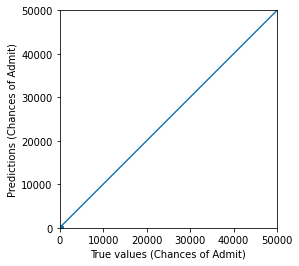

In [ ]:
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_label)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True values (Chances of Admit)')
plt.ylabel('Predictions (Chances of Admit)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)